## Mini-Project 1: Introduction to Text Data and Preprocessing
Handle raw text data and prepare it for training an LLM

1. **Collect a Text Dataset**:
Example:
 - [Project Gutenberg](https://www.gutenberg.org/) for classic books.
 - [Kaggle datasets](https://www.kaggle.com/datasets)

In [44]:
import urllib.request
import os

url = "https://www.gutenberg.org/files/64317/64317-0.txt"
filename = "/Users/bessy/Codework/CSTU/LLM/The_Great_Gatsby.txt"  # path

def download_file(url, filename):
   # check the path
  os.makedirs(os.path.dirname(filename), exist_ok=True)

  # download the file
  urllib.request.urlretrieve(url, filename)

download_file(url, filename)

In [46]:
# read the text file
with open(filename, "r") as file:
  raw_text = file.read()

print(raw_text[:500]) # print the first 500 characters

*** START OF THE PROJECT GUTENBERG EBOOK 64317 ***




                           The Great Gatsby
                                  by
                          F. Scott Fitzgerald


                           Table of Contents

I
II
III
IV
V
VI
VII
VIII
IX


                              Once again
                                  to
                                 Zelda


  Then wear the gold hat, if that will move her;
  If you can bounce high, bounce for her too,
  Till she cry “Lover, go


2. **Text Cleaning**:
- Remove any unwanted characters, like extra spaces, special characters, and numbers

In [49]:
 import re

 def clean_text(text):
    # remove extra spaces
    text = " ".join(text.split())

    # remove non-alphabetic characters (keep only lettera and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)


 # clean the raw text
 cleaned_text = clean_text(raw_text)
 print(cleaned_text[:500])

 START OF THE PROJECT GUTENBERG EBOOK   The Great Gatsby by F Scott Fitzgerald Table of Contents I II III IV V VI VII VIII IX Once again to Zelda Then wear the gold hat if that will move her If you can bounce high bounce for her too Till she cry Lover goldhatted highbouncing lover I must have you Thomas Parke dInvilliers I In my younger and more vulnerable years my father gave me some advice that Ive been turning over in my mind ever since Whenever you feel like criticizing anyone he told me jus


3. **Split the Data into Sentences**:
- Split the text into sentences or paragraphs, so the model can handle the one at a time

In [50]:
!pip install nltk

In [51]:
import nltk

In [53]:
nltk.download('punkt')
nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('corpus')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [55]:
def split_into_sentences(text):
    return nltk.sent_tokenize(text)

# Split the cleaned text into sentences
sentences = split_into_sentences(cleaned_text)
print(sentences[:5])

[' START OF THE PROJECT GUTENBERG EBOOK   The Great Gatsby by F Scott Fitzgerald Table of Contents I II III IV V VI VII VIII IX Once again to Zelda Then wear the gold hat if that will move her If you can bounce high bounce for her too Till she cry Lover goldhatted highbouncing lover I must have you Thomas Parke dInvilliers I In my younger and more vulnerable years my father gave me some advice that Ive been turning over in my mind ever since Whenever you feel like criticizing anyone he told me just remember that all the people in this world havent had the advantages that youve had He didnt say any more but weve always been unusually communicative in a reserved way and I understood that he meant a great deal more than that In consequence Im inclined to reserve all judgements a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person 

## Mini-Project 2: Tokenization and Text Representation
Convert text into tokens, the basic units that a language model can process

1. **Tokenize the Text**:
- Tokenization is the process of breaking down the text into smaller units, like words or subwords.
- Use NLTK or Hugging Face's Tokenizer for this.

In [56]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the sentences
tokens = tokenize_text(cleaned_text)
print(tokens[:20])

['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'The', 'Great', 'Gatsby', 'by', 'F', 'Scott', 'Fitzgerald', 'Table', 'of', 'Contents', 'I', 'II', 'III', 'IV']


2. **Tokenization with Subwords**:
- Use Hugging Face's Tokenizer to tokenize text into subwords, which is ofter used in modern LLMs like GPT
- Install the Hugging Face Library

In [57]:
!pip install transformers

In [58]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokens = tokenizer.tokenize(cleaned_text)
print(tokens[:20])

['ĠSTART', 'ĠOF', 'ĠTHE', 'ĠPRO', 'JECT', 'ĠG', 'UT', 'EN', 'BER', 'G', 'ĠE', 'BOOK', 'Ġ', 'Ġ', 'ĠThe', 'ĠGreat', 'ĠG', 'ats', 'by', 'Ġby']


## Mini-Project 3: Encoding and Padding
Convert tokens into numberical data and pad sequences for uniformity

1. **Token Encoding**:
- Convert tokens into numerical representations using token IDs

In [59]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

encoded = tokenizer.encode(cleaned_text, truncation=True, max_length=512)
print(encoded[:20])

[33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 383, 3878, 402, 1381, 1525, 416]


2. **Padding Sequences**:
- LLM require input sentences to be of the same length, so we pad shorter sequences to the same length

In [60]:
# from transformers import GPT2Tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer.pad_token = tokenizer.eos_token

inputs = tokenizer(cleaned_text, padding = True, truncation=True) # return_tensors = "pt"
print(inputs[:20])

{'input_ids': [33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 383, 3878, 402, 1381, 1525, 416], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


3. **Truncation**:
- If the text exceeds a certain length, truncate it to fit within the model's maximum length.

In [61]:
inputs = tokenizer(cleaned_text, padding = True, truncation = True) # return_tensors = "pt"
print(inputs[:20])

{'input_ids': [33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 383, 3878, 402, 1381, 1525, 416], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## Mini-Project 4: Creating a Data Pipeline
Organize text preprocessing steps into a clean and reusable pipeline

1. **Create a Data Preprocessing Pipeline:**:
- Combine all the steps(cleaning, tokenizing, padding) into a single function or pipeline.
- The preprocess_text function combines text cleaning, tokenization, padding and truncation into a single pipeline

In [62]:
from transformers import GPT2Tokenizer

def preprocess_text(text, tokenizer, max_length=512):
    # step 1: clean text
    cleaned_text = clean_text(text)

    # step 2: tokenize
    tokens = tokenizer.encode(cleaned_text, truncation=True, padding='max_length', max_length=max_length)
    return tokens


text = raw_text
tokens = preprocess_text(text, tokenizer)
print(tokens[:20])

[33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 383, 3878, 402, 1381, 1525, 416]


2. **Build a dataset for Model Training:**:
- Organize multiple sentences or documents into a format ready for training.
- Use **Pytorch** or **TensorFlow** to convert the tokenized data into datasets.
- The TextDataset class in PyTorch handles tokenizing and preparing text for training

In [63]:
import torch
from torch.utils.data import Dataset
from transformers import GPT2Tokenizer

In [64]:
# step 1: create a custom dataset class
class TextDataset(Dataset):
  def __init__(self, texts, tokenizer, max_length=512):
    self.texts = texts
    self.tokenizer = tokenizer
    self.max_length = max_length

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    # tokenize each text sample and return as tensor
    encoding = self.tokenizer.encode(self.texts[idx], truncation=True, \
                                     padding='max_length', max_length=self.max_length)
    return torch.tensor(encoding)

texts = [tokens]
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# set the pad token to be the same as eos_token(for GPT-2)
tokenizer.pad_token = tokenizer.eos_token

# create the dataset
dataset = TextDataset(texts, tokenizer)

print(dataset[0])        # the tokenized version of the first text

for i in range(min(20, len(dataset))):
  print(dataset[i])

tensor([33303,  3963,  3336, 21965, 23680,   402,  3843,  1677, 13246,    38,
          412, 39453,   220,   220,   383,  3878,   402,  1381,  1525,   416,
          376,  4746, 28397,  8655,   286, 26714,   314,  2873,  6711,  8363,
          569, 13889, 19691, 25197, 22631,  4874,   757,   284, 22166,  3244,
         5806,   262,  3869,  6877,   611,   326,   481,  1445,   607,  1002,
          345,   460, 20110,  1029, 20110,   329,   607,  1165, 17888,   673,
         3960, 40414,  3869, 11653,   276,  1029,    65, 18155, 18854,   314,
         1276,   423,   345,  5658,  2547,   365,   288, 19904,   359,  3183,
          314,   554,   616,  7099,   290,   517,  8826,   812,   616,  2988,
         2921,   502,   617,  5608,   326,   314,   303,   587,  6225,   625,
          287,   616,  2000,  1683,  1201, 21326,   345,  1254,   588, 26816,
         2687,   339,  1297,   502,   655,  3505,   326,   477,   262,   661,
          287,   428,   995,   387,  1151,   550,   262, 13391, 

3. **Using the dataset with a DataLoader**:
- PyTorch's DataLoader can efficiently handle batching, shuffling and feeding data into a model for training

In [65]:
from torch.utils.data import DataLoader

# create the Data_loader for batching the dataset
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate through the DataLoader
for batch in dataloader:
    print(batch.shape)
    print(batch)

torch.Size([1, 512])
tensor([[33303,  3963,  3336, 21965, 23680,   402,  3843,  1677, 13246,    38,
           412, 39453,   220,   220,   383,  3878,   402,  1381,  1525,   416,
           376,  4746, 28397,  8655,   286, 26714,   314,  2873,  6711,  8363,
           569, 13889, 19691, 25197, 22631,  4874,   757,   284, 22166,  3244,
          5806,   262,  3869,  6877,   611,   326,   481,  1445,   607,  1002,
           345,   460, 20110,  1029, 20110,   329,   607,  1165, 17888,   673,
          3960, 40414,  3869, 11653,   276,  1029,    65, 18155, 18854,   314,
          1276,   423,   345,  5658,  2547,   365,   288, 19904,   359,  3183,
           314,   554,   616,  7099,   290,   517,  8826,   812,   616,  2988,
          2921,   502,   617,  5608,   326,   314,   303,   587,  6225,   625,
           287,   616,  2000,  1683,  1201, 21326,   345,  1254,   588, 26816,
          2687,   339,  1297,   502,   655,  3505,   326,   477,   262,   661,
           287,   428,   995,  

## Mini-Project 5: Visualizing Tokenization and Data
Visualize the data preprocessing steps and gain insights into how the data is processed

1. **Visualize Tokenization**:
- Plot the distribution of the number of tokens per sentence
- Use libraries like Matplotlib to visualize token lengths.

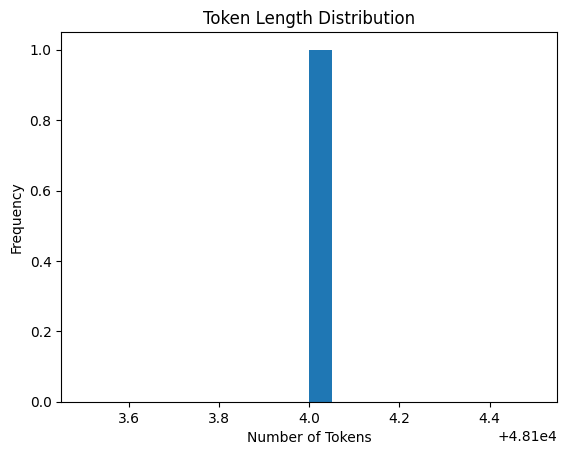

In [66]:
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the sentences
tokens = tokenize_text(cleaned_text)

sentence_lengths = [len(tokenize_text(sentence)) for sentence in sentences]
plt.hist(sentence_lengths, bins=20)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.show()

2. **Visualize Word Frequencies**:
- Use a word cloud or bar chart to visualize the most common words in the dataset

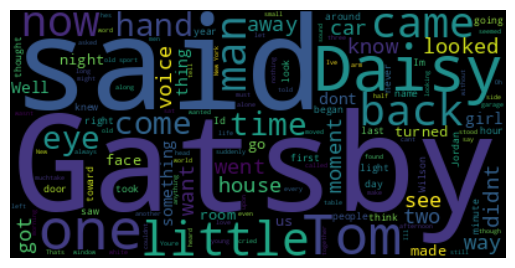

In [67]:
from wordcloud import WordCloud

# Combine all sentences into a single string
wordcloud = WordCloud().generate(' '.join(tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Final Project: Complete Text Preprocessing Pipeline
Combine all the steps from the previous mini-projects into a complete text preprocessing pipeline

1. **Create a complete text preprocessing pipeline** that includes::
- Collecting raw text
- Cleaning the text
- Tokenizing and encoding
- Padding and truncating sequences
- Storing the processed data in a usable format for model training

#### 1.1 Download and Clean the Text

In [68]:
import torch
from torch.utils.data import Dataset
from transformers import GPT2PreTrainedModel
import re

# 1. Collect raw text
import urllib.request
import os

url = "https://www.gutenberg.org/files/1342/1342-0.txt"
filename = "/Users/bessy/Codework/CSTU/LLM/Pried_and_Prejudice.txt"  # path

def download_file(url, filename):
   # check the path
  os.makedirs(os.path.dirname(filename), exist_ok=True)

  # download the file
  urllib.request.urlretrieve(url, filename)

download_file(url, filename)

In [69]:
# read the text file
with open(filename, "r") as file:
  raw_text = file.read()

print(raw_text[:500]) # print the first 500 characters

*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***
                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




             


In [70]:
# 2. Clean the text
import re

def clean_text(text):
  # remove extra spaces
  text = " ".join(text.split())

  # remove non-alphabetic characters (keep only lettera and spaces)
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  return text

  # Remove special characters
  text = re.sub(r'[^\w\s]', '', text)

#### 1.2 Tokenization and Preprocessing

In [71]:
def preprocess_text(raw_text, tokenizer, max_length=512):
    # step 1: clean text
    cleaned_text = clean_text(raw_text)

    # step 2: tokenize
    tokenizer.pad_token = tokenizer.eos_token
    tokens = tokenizer.encode(cleaned_text, truncation=True, padding='max_length', max_length=max_length)

    return tokens

text = raw_text
tokens = preprocess_text(text, tokenizer)
print(tokens[:20])


[33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 23279, 1358, 22319, 49697, 11096, 1677]


#### 1.3 Sentence Tokenization (NLTK)

In [72]:
# 3. Tokenize and encode
!pip install nltk

In [73]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [74]:
def split_into_sentences(text):
    return nltk.sent_tokenize(text)

# Split the cleaned text into sentences
sentences = split_into_sentences(cleaned_text)
print(sentences[:5])

[' START OF THE PROJECT GUTENBERG EBOOK   The Great Gatsby by F Scott Fitzgerald Table of Contents I II III IV V VI VII VIII IX Once again to Zelda Then wear the gold hat if that will move her If you can bounce high bounce for her too Till she cry Lover goldhatted highbouncing lover I must have you Thomas Parke dInvilliers I In my younger and more vulnerable years my father gave me some advice that Ive been turning over in my mind ever since Whenever you feel like criticizing anyone he told me just remember that all the people in this world havent had the advantages that youve had He didnt say any more but weve always been unusually communicative in a reserved way and I understood that he meant a great deal more than that In consequence Im inclined to reserve all judgements a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person 

In [75]:
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the sentences
tokens = tokenize_text(cleaned_text)
print(tokens[:20])

['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'The', 'Great', 'Gatsby', 'by', 'F', 'Scott', 'Fitzgerald', 'Table', 'of', 'Contents', 'I', 'II', 'III', 'IV']


In [76]:
!pip install transformers

In [77]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokens = tokenizer.tokenize(cleaned_text)
print(tokens[:20])

['ĠSTART', 'ĠOF', 'ĠTHE', 'ĠPRO', 'JECT', 'ĠG', 'UT', 'EN', 'BER', 'G', 'ĠE', 'BOOK', 'Ġ', 'Ġ', 'ĠThe', 'ĠGreat', 'ĠG', 'ats', 'by', 'Ġby']


In [78]:
encoded = tokenizer.encode(cleaned_text, truncation=True, max_length=512)
print(encoded[:20])

[33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 383, 3878, 402, 1381, 1525, 416]


#### 1.4 Padding and Truncating with Hugging Face Tokenizer

In [79]:
# 4. Padding and truncating
tokenizer.pad_token = tokenizer.eos_token
inputs = tokenizer(cleaned_text, padding = True, truncation=True) # return_tensors = "pt"
print(inputs[:20])

{'input_ids': [33303, 3963, 3336, 21965, 23680, 402, 3843, 1677, 13246, 38, 412, 39453, 220, 220, 383, 3878, 402, 1381, 1525, 416], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


#### 1.5 Creating the Dataset

In [80]:
# 5. Create Dataset for Model Training
import torch
from torch.utils.data import Dataset
from transformers import GPT2Tokenizer

In [81]:
# step 1: create a custom dataset class
class TextDataset(Dataset):
  def __init__(self, texts, tokenizer, max_length=512):
    self.texts = texts
    self.tokenizer = tokenizer
    self.max_length = max_length

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    # tokenize each text sample and return as tensor
    encoding = self.tokenizer.encode(self.texts[idx], truncation=True, \
                                     padding='max_length', max_length=self.max_length)
    return torch.tensor(encoding)

texts = [tokens]
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# set the pad token to be the same as eos_token(for GPT-2)
tokenizer.pad_token = tokenizer.eos_token

# create the dataset
dataset = TextDataset(texts, tokenizer)

print(dataset[0])        # the tokenized version of the first text

for i in range(min(20, len(dataset))):
  print(dataset[i])

tensor([33303,  3963,  3336, 21965, 23680,   402,  3843,  1677, 13246,    38,
          412, 39453,   220,   220,   383,  3878,   402,  1381,  1525,   416,
          376,  4746, 28397,  8655,   286, 26714,   314,  2873,  6711,  8363,
          569, 13889, 19691, 25197, 22631,  4874,   757,   284, 22166,  3244,
         5806,   262,  3869,  6877,   611,   326,   481,  1445,   607,  1002,
          345,   460, 20110,  1029, 20110,   329,   607,  1165, 17888,   673,
         3960, 40414,  3869, 11653,   276,  1029,    65, 18155, 18854,   314,
         1276,   423,   345,  5658,  2547,   365,   288, 19904,   359,  3183,
          314,   554,   616,  7099,   290,   517,  8826,   812,   616,  2988,
         2921,   502,   617,  5608,   326,   314,   303,   587,  6225,   625,
          287,   616,  2000,  1683,  1201, 21326,   345,  1254,   588, 26816,
         2687,   339,  1297,   502,   655,  3505,   326,   477,   262,   661,
          287,   428,   995,   387,  1151,   550,   262, 13391, 

#### 1.6 Using Dataloader for Batching

In [82]:
from torch.utils.data import DataLoader

# create the Data_loader for batching the dataset
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate through the DataLoader
for batch in dataloader:
    print(batch.shape)
    print(batch)

torch.Size([1, 512])
tensor([[33303,  3963,  3336, 21965, 23680,   402,  3843,  1677, 13246,    38,
           412, 39453,   220,   220,   383,  3878,   402,  1381,  1525,   416,
           376,  4746, 28397,  8655,   286, 26714,   314,  2873,  6711,  8363,
           569, 13889, 19691, 25197, 22631,  4874,   757,   284, 22166,  3244,
          5806,   262,  3869,  6877,   611,   326,   481,  1445,   607,  1002,
           345,   460, 20110,  1029, 20110,   329,   607,  1165, 17888,   673,
          3960, 40414,  3869, 11653,   276,  1029,    65, 18155, 18854,   314,
          1276,   423,   345,  5658,  2547,   365,   288, 19904,   359,  3183,
           314,   554,   616,  7099,   290,   517,  8826,   812,   616,  2988,
          2921,   502,   617,  5608,   326,   314,   303,   587,  6225,   625,
           287,   616,  2000,  1683,  1201, 21326,   345,  1254,   588, 26816,
          2687,   339,  1297,   502,   655,  3505,   326,   477,   262,   661,
           287,   428,   995,  

### Testing the Pipeline

1. **Small dataset**:

In [83]:
small_texts = [
  "Twinkle, twinkle, little star,",
  "How I wonder what you are!",
  "Up above the world so high,",
  "Like a diamond in the sky.",
  "Twinkle, twinkle, little star,",
  "How I wonder what you are!"
  ]

# clean the text, tokenize and encode
small_tokens = [preprocess_text(text, tokenizer) for text in small_texts]

# create the dataset
small_dataset = TextDataset(small_tokens, tokenizer)

# create the dataloader
small_dataloader = DataLoader(small_dataset, batch_size=2, shuffle=True)

print("First sample: ", small_dataset[0])
print("Second sample: ", small_dataset[1])

# Example of using the DataLoader
for batch in small_dataloader:
    print(batch.shape)
    print(batch)

First sample:  tensor([ 5080, 19894,   665, 19894,  1310,  3491, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256,

In [84]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

for batch in small_dataloader:
    token_ids = batch
    decoded_text = tokenizer.decode(token_ids[0], skip_special_tokens=True)
    print(decoded_text)

How I wonder what you are
Like a diamond in the sky
How I wonder what you are


2. **Large dataset**:

In [90]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2PreTrainedModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

class TextDataset(Dataset):
  def __init__(self, texts, tokenizer, max_length=512):
    self.texts = texts
    self.tokenizer = tokenizer
    self.max_length = max_length

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    # tokenize each text sample and return as tensor
    encoding = self.tokenizer.encode(self.texts[idx], truncation=True, \
                                     padding='max_length', max_length=self.max_length)
    return torch.tensor(encoding)

def preprocess_text(text, tokenizer, max_length=512):
    # step 1: clean text
    cleaned_text = clean_text(text)

    # step 2: tokenize
    tokens = tokenizer.encode(cleaned_text, truncation=True, padding='max_length', max_length=max_length)
    return tokens

large_texts = small_texts * 1000

# clean the text, tokenize and encode
large_tokens = [preprocess_text(text, tokenizer) for text in large_texts]

# create the dataset
large_dataset = TextDataset(large_tokens, tokenizer)

# create the dataloader
large_dataloader = DataLoader(large_dataset, batch_size=2, shuffle=True)

print("First sample: ", large_dataset[0])
print("Second sample: ", large_dataset[1])

# Example of using the DataLoader to print tokenized and decoded text
for batch in large_dataloader:
    print("Batch shape: ", batch.shape)
    # Decode the first item in the batch
    decoded_text = tokenizer.decode(batch[0], skip_special_tokens=True)
    print("Decoded text: ", decoded_text)
    break

First sample:  tensor([ 5080, 19894,   665, 19894,  1310,  3491, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256,

3. **Noisy dataset**:

In [91]:
noisy_texts = [
    "Hey!! What’s up? 😂",
    "Lmaoo that was funny!!",
    "Gotta go, brb!",
    "No wayyy!!! 😂😂"
]
# clean the text
noisy_cleaned = [clean_text(text) for text in noisy_texts]

# tokenize and encode
noisy_tokens = [preprocess_text(text, tokenizer) for text in noisy_cleaned]

# create the dataset
noisy_dataset = TextDataset(noisy_tokens, tokenizer)

# create the dataloader
noisy_dataloader = DataLoader(noisy_dataset, batch_size=2, shuffle=True)

print(noisy_dataset[0])
print(noisy_dataset[1])

tensor([10814, 28556,   510, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 

4. **Different language dataset**:

In [92]:
multilingual_texts = [
    "Happy Birthday to you!",  # English
    "Joyeux anniversaire à toi!",  # French
    "Feliz cumpleaños a ti!",  # Spanish
    "Herzlichen Glückwunsch zum Geburtstag!",  # German
    "Buon compleanno a te!",  # Italian
    "お誕生日おめでとうございます！",  # Japanese
    "생일 축하합니다!",  # Korean
    "С Днем Рождения!",  # Russian
    "Selamat ulang tahun!",  # Indonesian
    "Wszystkiego najlepszego z okazji urodzin!"  # Polish
    ]

# clean the text
multilingual_cleaned = [clean_text(text) for text in multilingual_texts]

# tokenize and encode
multilingual_tokens = [preprocess_text(text, tokenizer) for text in multilingual_cleaned]

# create the dataset
multilingual_dataset = TextDataset(multilingual_tokens, tokenizer)

# create the dataloader
multilingual_dataloader = DataLoader(multilingual_dataset, batch_size=2, shuffle=True)

print(multilingual_dataset[0])
print(multilingual_dataset[1])

tensor([25082, 33511,   284,   345, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 

4. **Imbalanced language dataset**:

In [94]:
imbalanced_texts = [
    "The sky is blue.",
    "The stars shine bright, lighting up the night.",
    "A gentle breeze flows through the trees, swaying the leaves.",
    "The moon is full,",
    "The world is quiet, as the night settles in.",
    "Birds will sing again at dawn, as the sun begins to rise.",
    "The night fades,",
    "Sleep now, and dream of brighter days ahead."
    ]

# clean the text
imbalanced_cleaned = [clean_text(text) for text in imbalanced_texts]

# tokenize and encode
imbalanced_tokens = [preprocess_text(text, tokenizer) for text in imbalanced_cleaned]

# create the dataset
imbalanced_dataset = TextDataset(imbalanced_tokens, tokenizer)

# create the dataloader
imbalanced_dataloader = DataLoader(imbalanced_dataset, batch_size=2, shuffle=True)

print(imbalanced_dataset[0])
print(imbalanced_dataset[1])

tensor([  464,  6766,   318,  4171, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 

### Mearsuring Performance with Large Dataset

In [96]:
import time
start_time = time.time()

large_dataset = TextDataset(large_texts, tokenizer)
end_time = time.time()
print(f"Time taken to preprocess large dataset: {end_time - start_time} seconds")

Time taken to preprocess large dataset: 0.00010466575622558594 seconds


### Edge Cases and Errors

In [97]:
empty_texts = ["", "", "      "]
empty_cleaned_texts = [clean_text(text) for text in empty_texts]
empty_dataset = TextDataset(empty_cleaned_texts, tokenizer)
print(empty_dataset[0])

tensor([])
